<a href="https://colab.research.google.com/github/Nishant1972/ML_project/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align='center'><b><font size="+7" face='arial' color='orange'>MINI PROJECT</font></p>


In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#import pandas as pd

#df = pd.read_csv("X_test.txt", delimiter=',')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import collections

In [ ]:
pip install sklearn-som

In [ ]:
from sklearn_som.som import SOM

In [ ]:
pip install scikit-learn-extra

In [ ]:
pip install sklearn-som

In [ ]:
pip install fuzzy-c-means

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn_som.som import SOM
from fcmeans import FCM

###  

## Importing dataset through Opendataset api using kaggle

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones')

Skipping, found downloaded files in "./human-activity-recognition-with-smartphones" (use force=True to force download)





## 70% train set
## 30% test set








In [ ]:
train_file = './human-activity-recognition-with-smartphones/train.csv'
test_file = './human-activity-recognition-with-smartphones/test.csv'

#      

In [ ]:
train_df = pd.read_csv(train_file)
train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.000000,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.000000,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.000000,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.9932

In [ ]:
test_df = pd.read_csv(test_file)
test_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

#### From above data we can observe that acceleration, gravity measure are all done in 3 Dimension.


#  


In [ ]:
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None


.

### LABEL assigning

In [ ]:
def set_target(df) :
  l = []
  for x in df['Activity'] :
    if x == 'WALKING' :
      l.append(1)
    elif x == 'WALKING_UPSTAIRS' :
      l.append(2)
    elif x == 'WALKING_DOWNSTAIRS' :
      l.append(3)
    elif x == 'SITTING' :
      l.append(4)
    elif x == 'STANDING' :
      l.append(5)
    else :
      l.append(6)
  return l

In [ ]:
train_df['target'] = set_target(train_df)
test_df['target'] = set_target(test_df)

.

###For data cleaning, Finding missing outliers and k-fold. It is easy to have merged data.

In [ ]:
df = pd.concat([train_df,test_df])

.

### Co-relation for eliminating unnecessary columns

In [ ]:
train_df.corr()['target']

tBodyAcc-mean()-X      -0.001508
tBodyAcc-mean()-Y       0.035346
tBodyAcc-mean()-Z       0.038644
tBodyAcc-std()-X       -0.721896
tBodyAcc-std()-Y       -0.816971
                          ...   
angle(X,gravityMean)    0.612318
angle(Y,gravityMean)   -0.632656
angle(Z,gravityMean)   -0.538593
subject                 0.057717
target                  1.000000
Name: target, Length: 563, dtype: float64

.
##### The above co-relation is not sufficient enough to eliminate columns. So, we need to do it manually.

In [ ]:
features = ['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z','tBodyAcc-std()-X','tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z','fBodyAcc-mean()-X','fBodyAcc-mean()-Y','fBodyAcc-mean()-Z','fBodyAcc-std()-X', 'fBodyAcc-std()-Y', 
 'fBodyAcc-std()-Z','angle(tBodyAccMean,gravity)','angle(tBodyAccJerkMean),gravityMean)','angle(tBodyGyroMean,gravityMean)',
 'angle(tBodyGyroJerkMean,gravityMean)','angle(X,gravityMean)','angle(Y,gravityMean)','angle(Z,gravityMean)']

#                      

In [ ]:
X = train_df[features]
y = train_df['target']
X_test = test_df[features]
y_test = test_df['target']


<p align='center'><b><font size="+3" face='arial'>Data Analysis</font></p>

.

##Missing Data

checking if there is any Nan value in dataset

In [ ]:
[x for x in train_df if train_df.isna == True]

[]

In [ ]:
[x for x in test_df if test_df.isna == True]

[]

In [ ]:
y_train=train_df.iloc[:,-2]
Category_count=np.array(y_train.value_counts())
activity=sorted(y_train.unique())
activity


['LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

.

## PLOT of percentage of activity in the training data sample

([<matplotlib.patches.Wedge at 0x7fd4c5fd80d0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

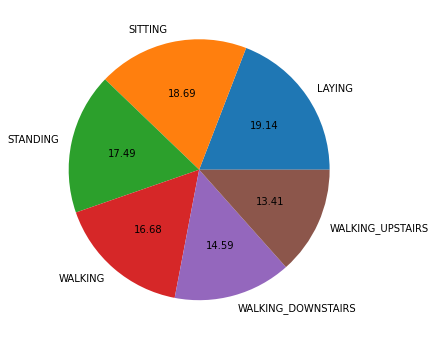

In [ ]:
plt.figure(figsize=(16,6))
plt.pie(Category_count,labels=activity, autopct = '%0.2f')

#                        

###  Below data shows exact np of samples for each activity 



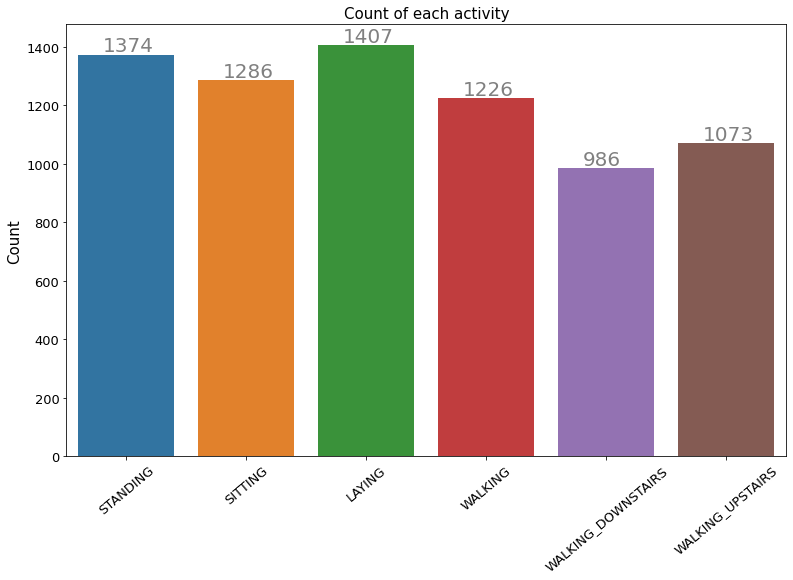

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "Activity", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel('')
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

#### There is lesser amount of sample in case of person walking upstair and downstairs. As, the activity is possible in certain situation only (in case of stairs only.)

#                          

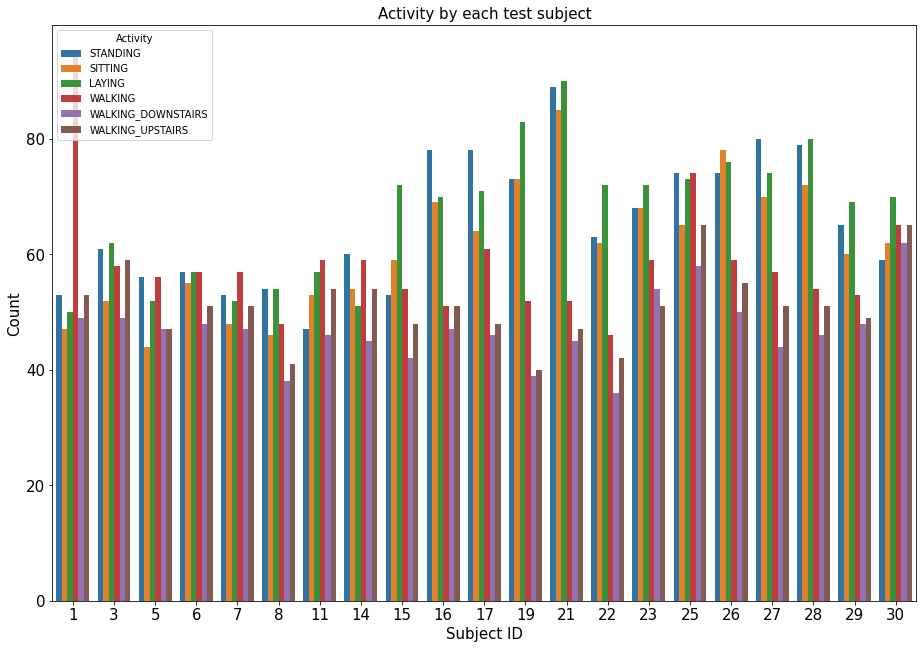

In [ ]:
#to check if no of sample is very less in some case then to eliminate that column.
#basically need to check class imbalance

fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject", hue = "Activity", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#### For subject-1, we can notice that class imbalance problem arrise. Training sample for walking i.e. class-1. 

.

<p align='center'><b><font size="+3" face='arial'>Classification</font></p>

.

###(**1**) Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted = clf.predict(X)
report = classification_report(train_df['target'],predicted,digits=4, output_dict=True)
fi = pd.DataFrame(report).transpose()
fi.to_csv('result.csv', mode='a', header=False)
fi


,precision,recall,f1-score,support
1,0.828958,0.849918,0.839307,1226.000000
2,0.872263,0.890960,0.881512,1073.000000
3,0.893617,0.851927,0.872274,986.000000
4,0.868197,0.793935,0.829407,1286.000000
5,0.833676,0.886463,0.859259,1374.000000
6,0.988748,0.999289,0.993991,1407.000000
accuracy,0.881801,0.881801,0.881801,0.881801
macro avg,0.880910,0.878749,0.879292,7352.000000
weighted avg,0.882275,0.881801,0.881488,7352.000000


In [ ]:
predicted = clf.predict(X_test)
print(classification_report(y_test,predicted,digits=4))

              precision    recall  f1-score   support

           1     0.6587    0.8367    0.7371       496
           2     0.8663    0.6879    0.7669       471
           3     0.7326    0.6786    0.7046       420
           4     0.8244    0.7556    0.7885       491
           5     0.7609    0.8496    0.8028       532
           6     1.0000    0.9497    0.9742       537

    accuracy                         0.7998      2947
   macro avg     0.8072    0.7930    0.7957      2947
weighted avg     0.8107    0.7998    0.8009      2947



.

In [ ]:
import numpy as np
x = np.array(df[features])
y = np.array(df['target'])

In [ ]:
x, y = shuffle(x, y, random_state=100)

In [ ]:
def kfold(features,y_actual):
  kf = KFold(n_splits=5,random_state=1000, shuffle=True)
  kf.get_n_splits(features)
  all_x_train = []
  all_x_test = []
  all_y_train = []
  all_y_test = []
  for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y_actual[train_index], y_actual[test_index]
    all_x_train.append(X_train)
    all_x_test.append(X_test)
    all_y_train.append(y_train)
    all_y_test.append(y_test)
  all_x_train, all_x_test, all_y_train, all_y_test  = np.array(all_x_train), np.array(all_x_test), np.array(all_y_train), np.array(all_y_test)
  for i in range(0, 5):
    all_y_train[i] = all_y_train[i].flatten()
  return all_x_train, all_x_test, all_y_train, all_y_test

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
all_x_train, all_x_test, all_y_train, all_y_test = kfold(x, y)

.

###(2) 5-Fold logistic regression 



For fold no: 1

Accuracy on training data: 0.8723146012865639
Testing Accuracy Score: 87.23300970873787
Confusion Matrix : 



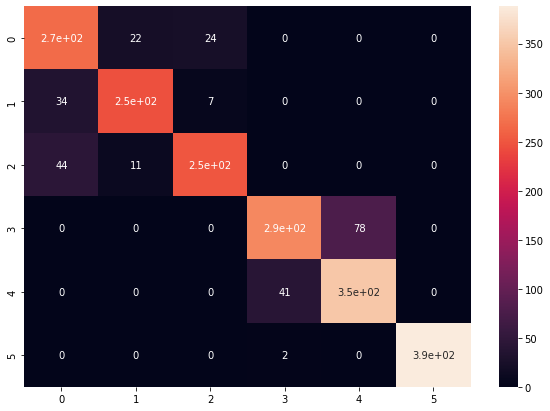


Classification Report: 


,precision,recall,f1-score,support
1,0.774566,0.853503,0.812121,314.00000
2,0.882143,0.857639,0.869718,288.00000
3,0.890071,0.820261,0.853741,306.00000
4,0.871642,0.789189,0.828369,370.00000
5,0.818182,0.895408,0.855055,392.00000
6,1.000000,0.994872,0.997429,390.00000
accuracy,0.872330,0.872330,0.872330,0.87233
macro avg,0.872767,0.868479,0.869406,2060.00000
weighted avg,0.875178,0.872330,0.872527,2060.00000





For fold no: 2

Accuracy on training data: 0.874013836630659
Testing Accuracy Score: 86.60194174757282
Confusion Matrix : 



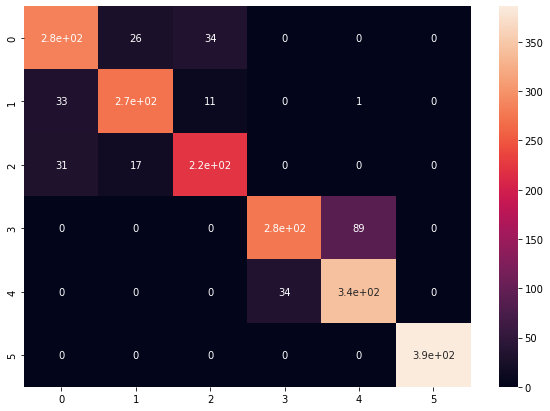


Classification Report: 


,precision,recall,f1-score,support
1,0.816092,0.825581,0.820809,344.000000
2,0.863492,0.858044,0.860759,317.000000
3,0.831461,0.822222,0.826816,270.000000
4,0.890675,0.756831,0.818316,366.000000
5,0.792148,0.909814,0.846914,377.000000
6,1.000000,1.000000,1.000000,386.000000
accuracy,0.866019,0.866019,0.866019,0.866019
macro avg,0.865645,0.862082,0.862269,2060.000000
weighted avg,0.868730,0.866019,0.865655,2060.000000





For fold no: 3

Accuracy on training data: 0.8714649836145163
Testing Accuracy Score: 88.68932038834951
Confusion Matrix : 



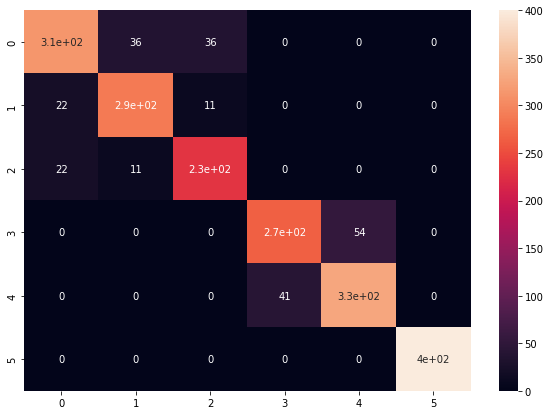


Classification Report: 


,precision,recall,f1-score,support
1,0.876751,0.812987,0.843666,385.000000
2,0.859701,0.897196,0.878049,321.000000
3,0.830935,0.875000,0.852399,264.000000
4,0.866450,0.831250,0.848485,320.000000
5,0.859008,0.889189,0.873838,370.000000
6,1.000000,1.000000,1.000000,400.000000
accuracy,0.886893,0.886893,0.886893,0.886893
macro avg,0.882141,0.884270,0.882739,2060.000000
weighted avg,0.887367,0.886893,0.886667,2060.000000





For fold no: 4

Accuracy on training data: 0.8758344459279038
Testing Accuracy Score: 86.89320388349515
Confusion Matrix : 



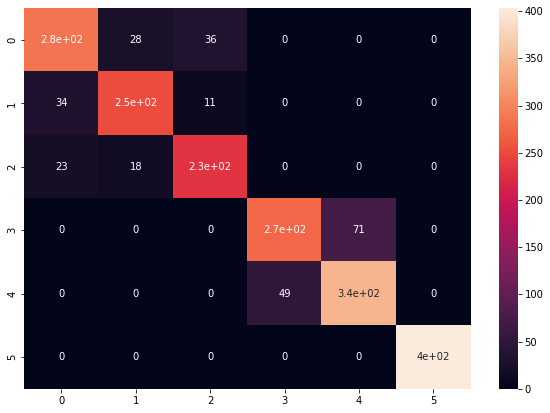


Classification Report: 


,precision,recall,f1-score,support
1,0.833333,0.816619,0.824891,349.000000
2,0.845638,0.848485,0.847059,297.000000
3,0.830935,0.849265,0.840000,272.000000
4,0.848297,0.794203,0.820359,345.000000
5,0.829327,0.875635,0.851852,394.000000
6,1.000000,1.000000,1.000000,403.000000
accuracy,0.868932,0.868932,0.868932,0.868932
macro avg,0.864588,0.864034,0.864027,2060.000000
weighted avg,0.869136,0.868932,0.868736,2060.000000





For fold no: 5

Accuracy on training data: 0.8762135922330098
Testing Accuracy Score: 86.1583292860612
Confusion Matrix : 



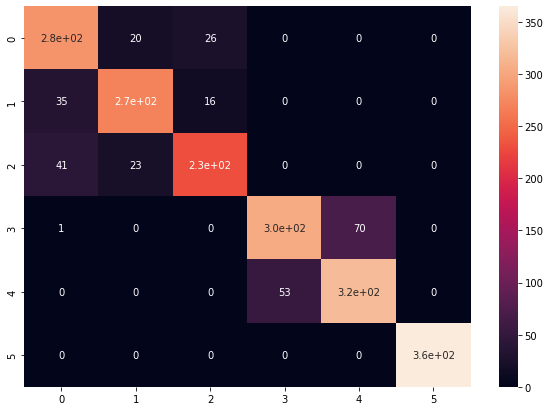


Classification Report: 


,precision,recall,f1-score,support
1,0.786704,0.860606,0.821997,330.000000
2,0.862620,0.841121,0.851735,321.000000
3,0.845588,0.782313,0.812721,294.000000
4,0.851955,0.811170,0.831063,376.000000
5,0.820513,0.857909,0.838794,373.000000
6,1.000000,1.000000,1.000000,365.000000
accuracy,0.861583,0.861583,0.861583,0.861583
macro avg,0.861230,0.858853,0.859385,2059.000000
weighted avg,0.862799,0.861583,0.861562,2059.000000


In [ ]:
for i in range(0, 5): 
  
  print('\n')
  print("For fold no:", i+1)
  print()

  logistic_reg_classifier = LogisticRegression(penalty = 'none', random_state=67, solver = 'sag', max_iter = 100).fit(all_x_train[i], all_y_train[i])
  
  #Accuracy for train set
  print("Accuracy on training data: " + str(logistic_reg_classifier.score(all_x_train[i], all_y_train[i])))
  predicted = logistic_reg_classifier.predict(all_x_test[i])
  
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  
  #confusion matrix using heat map
  print('Confusion Matrix : \n')
  array=confusion_matrix(all_y_test[i], predicted)
  df_cm = pd.DataFrame(array, index = [i for i in "012345"],columns = [i for i in "012345"])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True)
  plt.show()

  print("\nClassification Report: ")
  report = classification_report(all_y_test[i], predicted, labels =[1,2,3,4,5,6], digits=5, output_dict=True)
  fi = pd.DataFrame(report).transpose()
  fi.to_csv('result.csv', mode='a', header=False)
  display(fi)
  print()

.

###(3) SLP (Single Layer Perceptron)


For fold no: 1

Accuracy on training data: 0.6941376380628717
Testing Accuracy Score: 69.07766990291262
Confusion Matrix : 



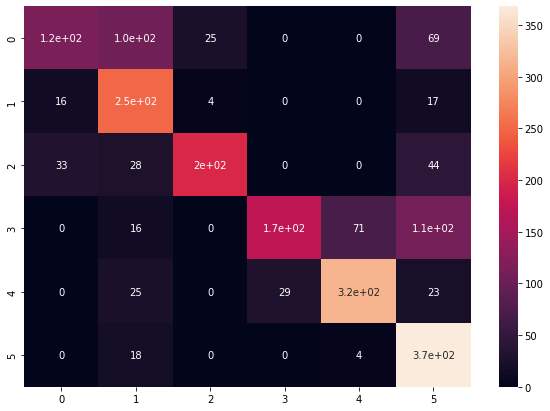

Classification Report : 


,precision,recall,f1-score,support
1,0.701220,0.366242,0.481172,314.000000
2,0.566591,0.871528,0.686731,288.000000
3,0.873913,0.656863,0.750000,306.000000
4,0.856436,0.467568,0.604895,370.000000
5,0.807692,0.803571,0.805627,392.000000
6,0.583201,0.943590,0.720862,390.000000
accuracy,0.690777,0.690777,0.690777,0.690777
macro avg,0.731509,0.684894,0.674881,2060.000000
weighted avg,0.733846,0.690777,0.679184,2060.000000




For fold no: 2

Accuracy on training data: 0.6885544362179876
Testing Accuracy Score: 71.31067961165049
Confusion Matrix : 



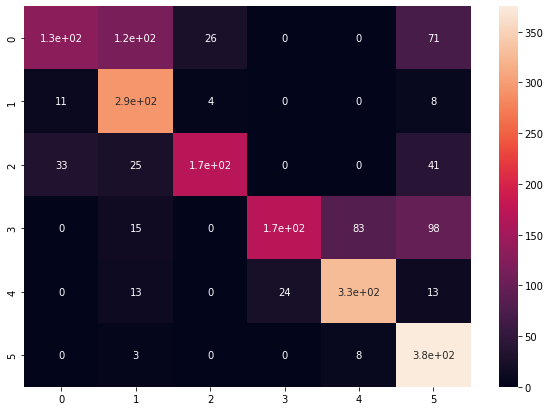

Classification Report : 


,precision,recall,f1-score,support
1,0.750000,0.383721,0.507692,344.000000
2,0.632258,0.927445,0.751918,317.000000
3,0.850746,0.633333,0.726115,270.000000
4,0.876289,0.464481,0.607143,366.000000
5,0.782297,0.867374,0.822642,377.000000
6,0.618812,0.971503,0.756048,386.000000
accuracy,0.713107,0.713107,0.713107,0.713107
macro avg,0.751734,0.707976,0.695260,2060.000000
weighted avg,0.748853,0.713107,0.695748,2060.000000




For fold no: 3

Accuracy on training data: 0.6940162641097221
Testing Accuracy Score: 69.12621359223301
Confusion Matrix : 



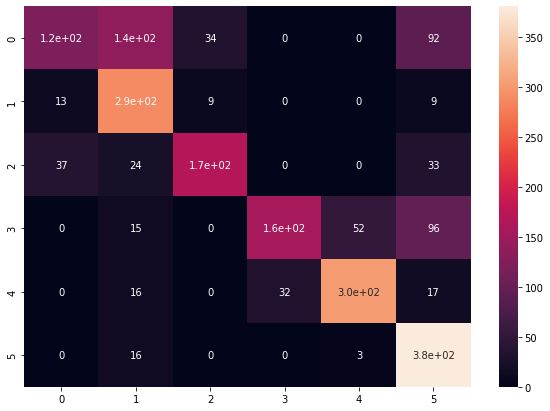

Classification Report : 


,precision,recall,f1-score,support
1,0.707602,0.314286,0.435252,385.000000
2,0.581162,0.903427,0.707317,321.000000
3,0.798122,0.643939,0.712788,264.000000
4,0.830688,0.490625,0.616896,320.000000
5,0.847222,0.824324,0.835616,370.000000
6,0.606688,0.952500,0.741245,400.000000
accuracy,0.691262,0.691262,0.691262,0.691262
macro avg,0.728581,0.688184,0.674852,2060.000000
weighted avg,0.724103,0.691262,0.672757,2060.000000




For fold no: 4

Accuracy on training data: 0.6949872557349193
Testing Accuracy Score: 68.73786407766991
Confusion Matrix : 



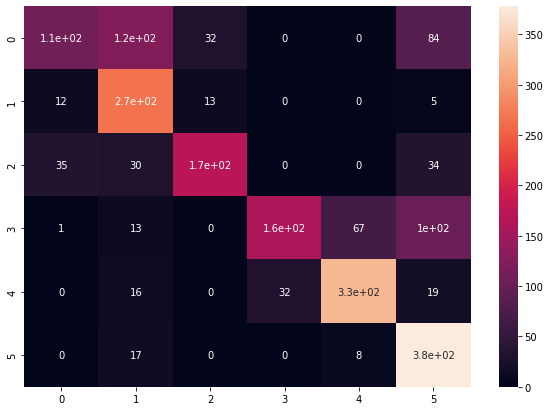

Classification Report : 


,precision,recall,f1-score,support
1,0.694268,0.312321,0.430830,349.000000
2,0.571734,0.898990,0.698953,297.000000
3,0.793578,0.636029,0.706122,272.000000
4,0.835052,0.469565,0.601113,345.000000
5,0.813433,0.829949,0.821608,394.000000
6,0.607717,0.937965,0.737561,403.000000
accuracy,0.687379,0.687379,0.687379,0.687379
macro avg,0.719297,0.680803,0.666031,2060.000000
weighted avg,0.719152,0.687379,0.669101,2060.000000




For fold no: 5

Accuracy on training data: 0.695631067961165
Testing Accuracy Score: 68.47984458474988
Confusion Matrix : 



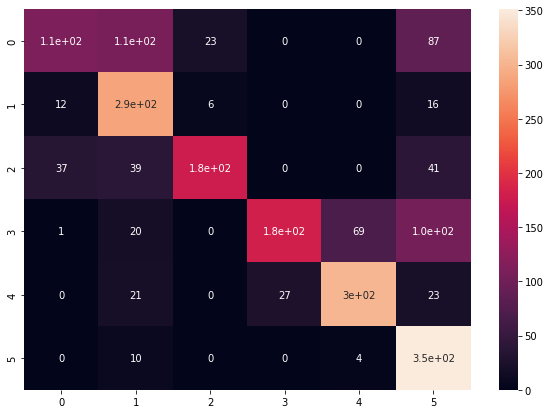

Classification Report : 


,precision,recall,f1-score,support
1,0.691358,0.339394,0.455285,330.000000
2,0.591753,0.894081,0.712159,321.000000
3,0.859223,0.602041,0.708000,294.000000
4,0.870192,0.481383,0.619863,376.000000
5,0.805333,0.809651,0.807487,373.000000
6,0.563403,0.961644,0.710526,365.000000
accuracy,0.684798,0.684798,0.684798,0.684798
macro avg,0.730210,0.681366,0.668887,2059.000000
weighted avg,0.730421,0.684798,0.670521,2059.000000


In [ ]:
from sklearn.linear_model import Perceptron
for i in range(0, 5): # for 5 fold
  
  print("\nFor fold no:", i+1)
  print()
  
  slp = Perceptron(random_state=1,penalty='elasticnet')
  slp.fit(all_x_train[0], all_y_train[0])
  
  print("Accuracy on training data: " + str(slp.score(all_x_train[i], all_y_train[i])))
  predicted = slp.predict(all_x_test[i])
  
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  
  #confusion matrix using heat map
  print('Confusion Matrix : \n')
  array=confusion_matrix(all_y_test[i], predicted)
  df_cm = pd.DataFrame(array, index = [i for i in "012345"],columns = [i for i in "012345"])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True)
  plt.show()

  print("Classification Report : ")
  report = classification_report(all_y_test[i], predicted, labels=[1, 2, 3, 4, 5, 6], digits=5,output_dict=True)
  fi = pd.DataFrame(report).transpose()
  fi.to_csv('result.csv', mode='a', header=False)
  display(fi)
  print()


.

###(4) MLP (Multi Layer Perceptron)


For fold no: 1

Accuracy on training data: 0.9705061293846341
Testing Accuracy Score: 0.9199029126213593
Confusion Matrix : 



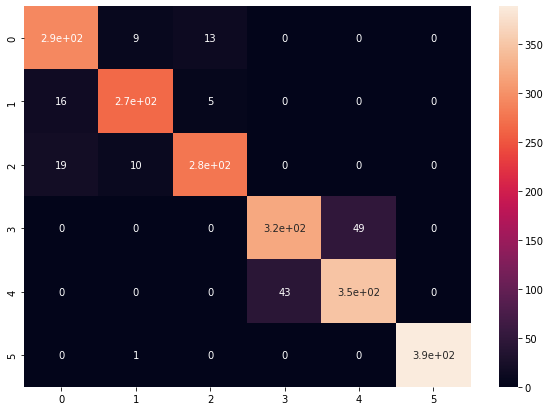

Classification Report : 


,precision,recall,f1-score,support
1,0.892966,0.929936,0.911076,314.000000
2,0.930314,0.927083,0.928696,288.000000
3,0.938983,0.905229,0.921797,306.000000
4,0.881868,0.867568,0.874659,370.000000
5,0.876884,0.890306,0.883544,392.000000
6,1.000000,0.997436,0.998716,390.000000
accuracy,0.919903,0.919903,0.919903,0.919903
macro avg,0.920169,0.919593,0.919748,2060.000000
weighted avg,0.920233,0.919903,0.919944,2060.000000




For fold no: 2

Accuracy on training data: 0.9577618643039204
Testing Accuracy Score: 0.970873786407767
Confusion Matrix : 



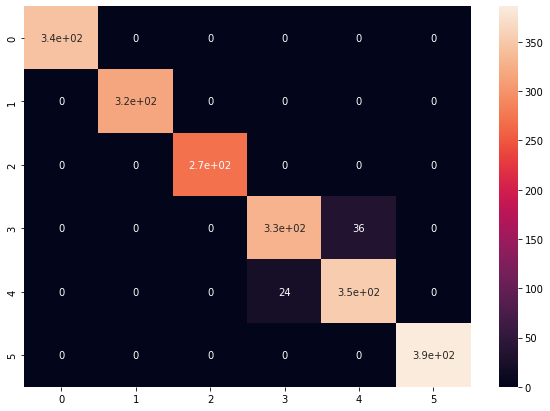

Classification Report : 


,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,344.000000
2,1.000000,1.000000,1.000000,317.000000
3,1.000000,1.000000,1.000000,270.000000
4,0.932203,0.901639,0.916667,366.000000
5,0.907455,0.936340,0.921671,377.000000
6,1.000000,1.000000,1.000000,386.000000
accuracy,0.970874,0.970874,0.970874,0.970874
macro avg,0.973276,0.972996,0.973056,2060.000000
weighted avg,0.971018,0.970874,0.970859,2060.000000




For fold no: 3

Accuracy on training data: 0.9571549945381721
Testing Accuracy Score: 0.9733009708737864
Confusion Matrix : 



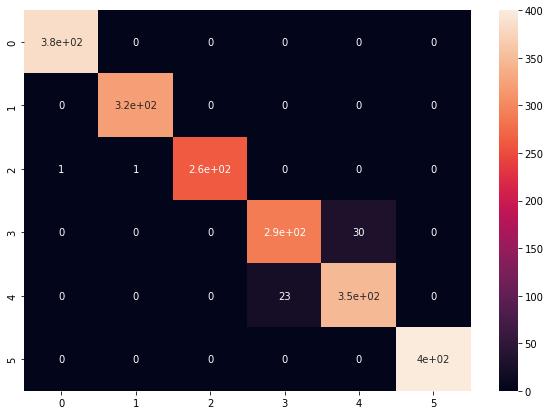

Classification Report : 


,precision,recall,f1-score,support
1,0.997409,1.000000,0.998703,385.000000
2,0.996894,1.000000,0.998445,321.000000
3,1.000000,0.992424,0.996198,264.000000
4,0.926518,0.906250,0.916272,320.000000
5,0.920424,0.937838,0.929050,370.000000
6,1.000000,1.000000,1.000000,400.000000
accuracy,0.973301,0.973301,0.973301,0.973301
macro avg,0.973541,0.972752,0.973111,2060.000000
weighted avg,0.973324,0.973301,0.973278,2060.000000




For fold no: 4

Accuracy on training data: 0.9590969777885666
Testing Accuracy Score: 0.9655339805825243
Confusion Matrix : 



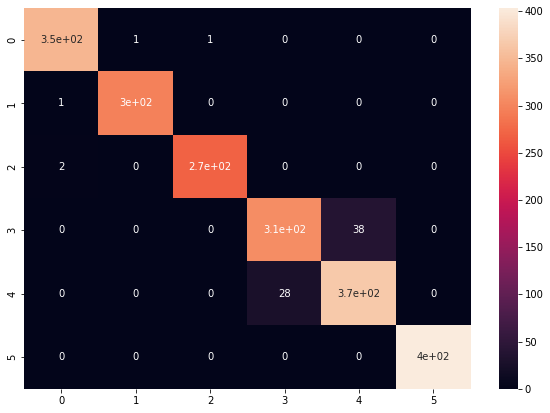

Classification Report : 


,precision,recall,f1-score,support
1,0.991429,0.994269,0.992847,349.000000
2,0.996633,0.996633,0.996633,297.000000
3,0.996310,0.992647,0.994475,272.000000
4,0.916418,0.889855,0.902941,345.000000
5,0.905941,0.928934,0.917293,394.000000
6,1.000000,1.000000,1.000000,403.000000
accuracy,0.965534,0.965534,0.965534,0.965534
macro avg,0.967788,0.967056,0.967365,2060.000000
weighted avg,0.965587,0.965534,0.965500,2060.000000




For fold no: 5

Accuracy on training data: 0.9574029126213592
Testing Accuracy Score: 0.9723166585721223
Confusion Matrix : 



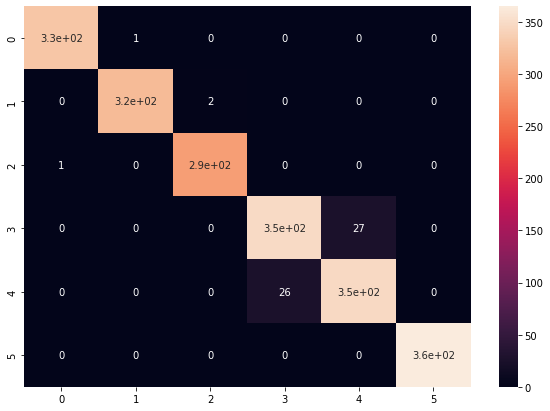

Classification Report : 


,precision,recall,f1-score,support
1,0.996970,0.996970,0.996970,330.000000
2,0.996875,0.993769,0.995320,321.000000
3,0.993220,0.996599,0.994907,294.000000
4,0.930667,0.928191,0.929427,376.000000
5,0.927807,0.930295,0.929050,373.000000
6,1.000000,1.000000,1.000000,365.000000
accuracy,0.972317,0.972317,0.972317,0.972317
macro avg,0.974257,0.974304,0.974279,2059.000000
weighted avg,0.972320,0.972317,0.972317,2059.000000


In [ ]:
for i in range(0, 5): 
  
  print("\nFor fold no:", i+1)
  print()
  
  mlp = MLPClassifier(hidden_layer_sizes=(100), activation='relu',solver='lbfgs', random_state=1, max_iter=1000).fit(all_x_train[0], all_y_train[0])
  mlp.predict(all_x_train[0])
  
  print("Accuracy on training data: " + str(mlp.score(all_x_train[i], all_y_train[i])))
  predicted = mlp.predict(all_x_test[i])

  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)))
  
  print('Confusion Matrix : \n')
  array=confusion_matrix(all_y_test[i], predicted)
  df_cm = pd.DataFrame(array, index = [i for i in "012345"],columns = [i for i in "012345"])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True)
  plt.show()

  print("Classification Report : ")
  labels = [1,2,3,4,5,6]
  report = classification_report(all_y_test[i], predicted, labels=labels, digits=5, output_dict=True)
  fi = pd.DataFrame(report).transpose()
  fi.to_csv('result.csv', mode='a', header=False)
  display(fi)
  print()

.

<p align='center'><b><font size="+3" face='arial'>Clustering</font></p>

##K-means

In [ ]:
kmean = KMeans(n_clusters=6)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmean.cluster_centers_

array([[ 0.26930958, -0.02498289, -0.02498289, -0.10795613, -0.17472635,
         0.01935934, -0.18023106, -0.2108133 , -0.03997119, -0.29630781,
        -0.16332103, -0.01819079, -0.18822767, -0.04145716,  0.50302895,
        -0.73999968, -0.01101691, -0.69896343,  0.23247542,  0.08652417],
       [ 0.27649025, -0.01471015, -0.01471015, -0.10693731, -0.98542657,
        -0.93869772, -0.94365159, -0.9838464 , -0.94926673, -0.9600616 ,
        -0.98625696, -0.9370523 , -0.93938931,  0.00961843,  0.0059067 ,
         0.00939365, -0.00736125, -0.74868374,  0.11447376, -0.01577492],
       [ 0.27395823, -0.01955122, -0.01955122, -0.10981334, -0.12178146,
         0.01738501, -0.18946491, -0.15194676, -0.0174143 , -0.27658551,
        -0.11307135, -0.03133031, -0.21187141,  0.02839158, -0.53376881,
         0.75015803, -0.18033037, -0.73505992,  0.22995064,  0.07939952],
       [ 0.27356632, -0.01745513, -0.01745513, -0.10903819, -0.96322599,
        -0.94424675, -0.94735844, -0.96931052, -

In [ ]:
y_kmeans = kmean.predict(X)
silhouette_score(X, y_kmeans)

0.29876295061160935

In [ ]:
kmean.inertia_

6668.993399562416

In [ ]:
y_kmeans = kmean.predict(X_test)
silhouette_score(X_test, y_kmeans)

0.2918999840135626

In [ ]:
y_kmeans = kmean.predict(x)
silhouette_score(x, y_kmeans)

0.2962418580884486

In [ ]:
kme = [dict(collections.Counter(y_kmeans))[x] for x in range(6)] 

([<matplotlib.patches.Wedge at 0x7fd4c588c750>,
 [Text(1.0378792196102073, 0.3644265707948683, '0'),
  Text(-0.22505847247975377, 1.0767305530935212, '1'),
  Text(-1.095117205951156, -0.10352924818491449, '2'),
  Text(-0.5389208739951349, -0.9589391490456108, '3'),
  Text(0.5004805417554407, -0.9795505231095438, '4'),
  Text(1.029271055823731, -0.3880735673084449, '5')],
 [Text(0.566115937969204, 0.19877812952447357, '10.75'),
  Text(-0.12275916680713841, 0.5873075744146479, '35.06'),
  Text(-0.5973366577915395, -0.05647049900995335, '11.38'),
  Text(-0.29395684036098263, -0.5230577176612422, '19.32'),
  Text(0.2729893864120585, -0.5343002853324784, '12.01'),
  Text(0.5614205759038532, -0.21167649125915172, '11.48')])

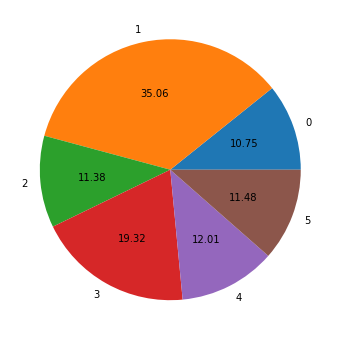

In [ ]:
plt.figure(figsize=(16,6))
plt.pie(kme,labels= set(y_kmeans), autopct = '%0.2f')

.

###The Elbow Method is not working well as there must be 6 clusters as per our need.

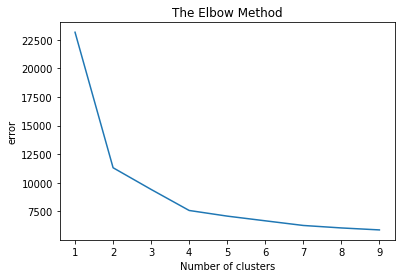

In [ ]:
error = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    error.append(kmeans.inertia_)
plt.plot(range(1, 10), error)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('error')
plt.show()

##K-medoid

In [ ]:
kmedoids = KMedoids(n_clusters=6, random_state=0).fit(X)


In [ ]:
y_kmed = kmedoids.predict(X)
silhouette_score(X, y_kmed)

0.20422496460449857

In [ ]:
kmedoids.inertia_

6967.723460015684

In [ ]:
y_kmed = kmedoids.predict(X_test)
silhouette_score(X_test, y_kmed)

0.2114440243325775

In [ ]:
y_kmed = kmedoids.predict(x)
silhouette_score(x, y_kmed)

0.20563284479085722

In [ ]:
kmed = [dict(collections.Counter(y_kmed))[x] for x in range(6)] 

([<matplotlib.patches.Wedge at 0x7fd4c5ccb990>,
 [Text(0.9558826002229266, 0.5443238508379519, '0'),
  Text(-0.14802714536436515, 1.0899944789930256, '1'),
  Text(-0.9547181919005444, 0.5463635914426908, '2'),
  Text(-1.0389860130013249, -0.3612589995939354, '3'),
  Text(0.041429747936250004, -1.0992195303877834, '4'),
  Text(0.997987768787416, -0.46262340337548347, '5')],
 [Text(0.5213905092125053, 0.29690391863888277, '16.48'),
  Text(-0.0807420792896537, 0.5945424430871048, '21.34'),
  Text(-0.5207553774002969, 0.2980165044232858, '7.82'),
  Text(-0.566719643455268, -0.19705036341487384, '19.38'),
  Text(0.02259804432886364, -0.5995742893024272, '21.17'),
  Text(0.5443569647931359, -0.2523400382048091, '13.82')])

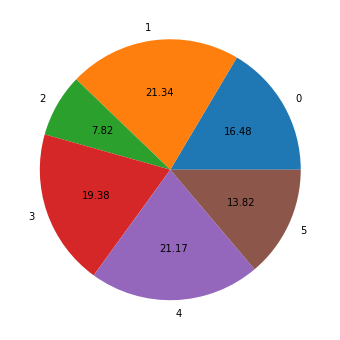

In [ ]:
plt.figure(figsize=(16,6))
plt.pie(kmed,labels= set(y_kmed), autopct = '%0.2f')

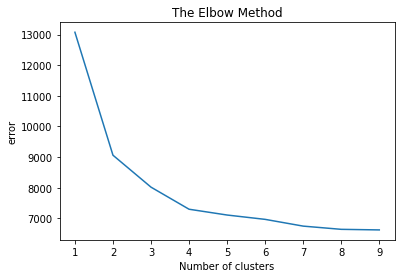

In [ ]:
error = []
for i in range(1, 10):
    kmedoid = KMedoids(n_clusters = i, random_state = 42)
    kmedoid.fit(X)
    error.append(kmedoid.inertia_)
plt.plot(range(1, 10), error)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('error')
plt.show()

In [ ]:
fcm = FCM(n_clusters=6)
fcm.fit(x)
y_fcm=fcm.predict(x)
y_fcm

array([4, 4, 5, ..., 1, 3, 5])

In [ ]:
silhouette_score(x, y_fcm)

0.24481882556013523

In [ ]:
def calc_sse(centers,x,y):
  sse=0
  for i in range(x.shape[0]):
    sse+=np.sum((x[i]-centers[y[i]])**2)

  return sse

In [ ]:
calc_sse(fcm.centers,x,y_fcm)

11381.700666365678